# CIFAR-10 Image Classification: Model Design and Implementation

For the **CIFAR-10 image classification task**, students are required to design and implement **three distinct custom CNN architectures** using **RGB input images** resized to a fixed dimension (e.g., **128 × 128 × 3**).



## CNN Model-1: Shallow CNN

This model focuses on simplicity and minimal depth.

**Architecture:**
- **Conv2D Layer**
  - Filters: 8  
  - Kernel size: 3 × 3  
  - Stride: 1  
  - Padding: None  
  - Activation: ReLU
- **Max-Pooling Layer**
  - Pool size: 2 × 2  
  - Stride: 2
- **Conv2D Layer**
  - Filters: 4  
  - Kernel size: 3 × 3  
  - Activation: ReLU
- **Max-Pooling Layer**
  - Pool size: 2 × 2  
  - Stride: 2
- **Flatten Layer**
- **Dense Layer**
  - Neurons: 8  
  - Activation: ReLU
- **Output Layer**
  - Suitable for CIFAR-10 classification (10 classes)

---

## CNN Model-2: Deeper CNN

This model increases representational capacity through additional depth and feature maps.

**Architecture:**
- **Conv2D Layer**
  - Filters: 16  
  - Kernel size: 3 × 3  
  - Activation: ReLU
- **Max-Pooling Layer**
  - Pool size: 2 × 2
- **Conv2D Layer**
  - Filters: 32  
  - Kernel size: 3 × 3  
  - Activation: ReLU
- **Max-Pooling Layer**
  - Pool size: 2 × 2
- **Conv2D Layer**
  - Filters: 64  
  - Kernel size: 3 × 3  
  - Activation: ReLU
- **Max-Pooling Layer**
  - Pool size: 2 × 2
- **Flatten Layer**
- **Dense Layer**
  - Neurons: 128  
  - Activation: ReLU
- **Dropout Layer**
  - Used for regularization
- **Output Layer**
  - Suitable for CIFAR-10 classification

---

## CNN Model-3: Enhanced CNN with Normalization and Larger Kernels

This model incorporates architectural enhancements to study their impact on performance.

**Architecture:**
- **Conv2D Layer**
  - Filters: 32  
  - Kernel size: 5 × 5  
  - Stride: 1
- **Batch Normalization**
- **ReLU Activation**
- **Max-Pooling Layer**
  - Pool size: 2 × 2
- **Conv2D Layer**
  - Filters: 64  
  - Kernel size: 3 × 3
- **Batch Normalization**
- **ReLU Activation**
- **Max-Pooling Layer**
  - Pool size: 2 × 2
- **Conv2D Layer**
  - Filters: 128  
  - Kernel size: 3 × 3  
  - Activation: ReLU
- **Max-Pooling Layer**
  - Pool size: 2 × 2
- **Flatten Layer**
- **Dense Layer**
  - Neurons: 256  
  - Activation: ReLU
- **Dropout Layer**
- **Dense Layer**
  - Neurons: 64  
  - Activation: ReLU
- **Dropout Layer**
- **Output Layer**
  - Suitable for CIFAR-10 classification

**Objective:**  
This configuration enables evaluation of the effects of increased depth, batch normalization, and larger receptive fields.

---

## Deep Neural Network (DNN) Model

In addition to CNNs, students must implement a **Deep Neural Network (DNN)** without convolutional or pooling layers.

**Architecture:**
- **Flatten Layer**
- **Dense Layer**
  - Neurons: 512  
  - Activation: ReLU
- **Dense Layer**
  - Neurons: 256  
  - Activation: ReLU
- **Dense Layer**
  - Neurons: 128  
  - Activation: ReLU
- **Output Layer**
  - Suitable for CIFAR-10 classification

---

## Training and Evaluation Requirements

- All **four models** must be trained **from scratch**
- Use the **same dataset split**, **optimizer**, **learning rate**, **batch size**, and **number of epochs**
- Models must be compared based on:
  - Training accuracy
  - Testing accuracy
  - Loss convergence
  - Number of parameters
  - Computational cost

**Results Presentation:**
- Training and validation **loss curves**
- Training and validation **accuracy curves**
- A concise **comparative discussion** highlighting strengths and weaknesses of each model


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    return (x_train, y_train), (x_test, y_test)

def get_resizing_layer():
    return layers.Resizing(128, 128)

In [2]:
def build_model_1():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        get_resizing_layer(),
        layers.Conv2D(8, (3, 3), strides=1, padding='valid', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(4, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(8, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [3]:
def build_model_2():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        get_resizing_layer(),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [4]:
def build_model_3():
    inputs = layers.Input(shape=(32, 32, 3))
    x = get_resizing_layer()(inputs)
    
    x = layers.Conv2D(32, (5, 5), strides=1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(64, (3, 3))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [5]:
def build_dnn_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        get_resizing_layer(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


Training Model-1 (Shallow CNN)...
Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.2360 - loss: 2.0240 - val_accuracy: 0.3010 - val_loss: 1.8854
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 57ms/step - accuracy: 0.3215 - loss: 1.8259 - val_accuracy: 0.3168 - val_loss: 1.8124
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.3491 - loss: 1.7547 - val_accuracy: 0.3364 - val_loss: 1.7513
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.3592 - loss: 1.7188 - val_accuracy: 0.3538 - val_loss: 1.7296
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.3664 - loss: 1.6936 - val_accuracy: 0.3536 - val_loss: 1.7219
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.3724 - loss: 1.6770 - val_accuracy: 0.3538 - val_loss: 1.7035
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.3764 - loss: 1.6634 - val_accuracy: 0.3498 - val_loss: 1.7368
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step -

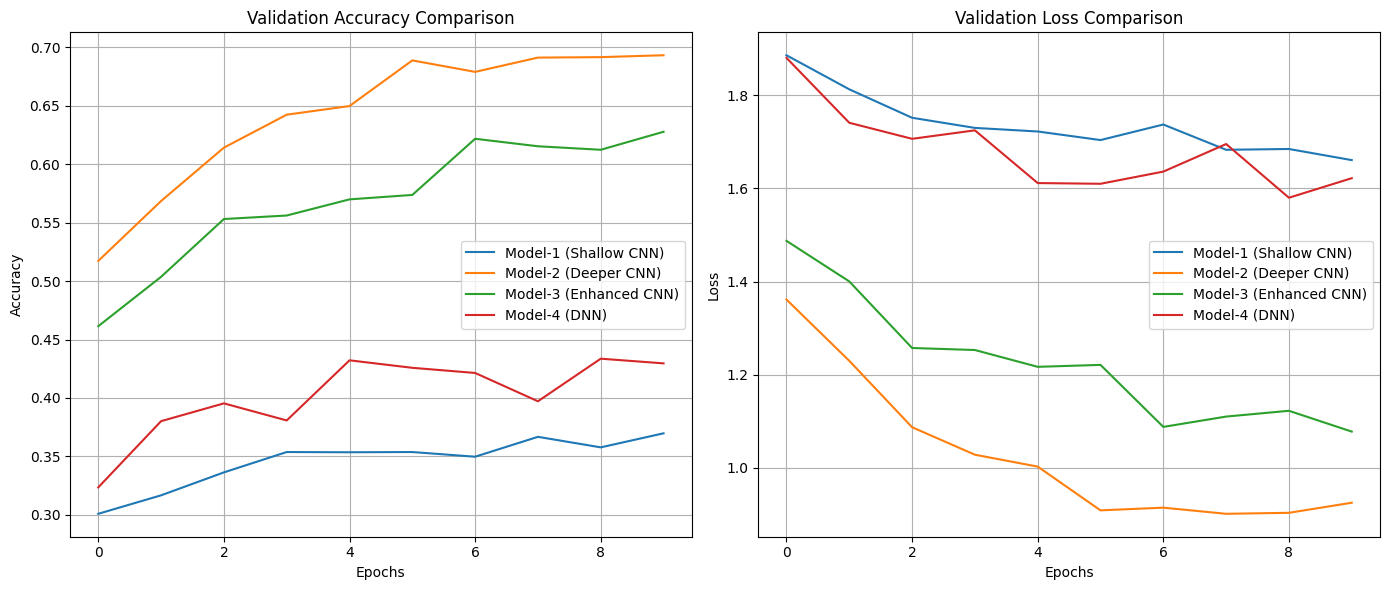


Comparative Discussion and Results:
--------------------------------------------------------------------------------
                 Model   Params  Train Acc  Val Acc  Test Acc
 Model-1 (Shallow CNN)    29414   0.381000   0.3698    0.3752
  Model-2 (Deeper CNN)  1630634   0.735422   0.6930    0.6833
Model-3 (Enhanced CNN)  6535050   0.684467   0.6276    0.6248
         Model-4 (DNN) 25331850   0.452022   0.4296    0.4276
--------------------------------------------------------------------------------


In [6]:
(x_train, y_train), (x_test, y_test) = load_data()

BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001

models_dict = {
    "Model-1 (Shallow CNN)": build_model_1(),
    "Model-2 (Deeper CNN)": build_model_2(),
    "Model-3 (Enhanced CNN)": build_model_3(),
    "Model-4 (DNN)": build_dnn_model()
}

history_dict = {}
evaluation_results = []

for name, model in models_dict.items():
    print(f"\nTraining {name}...")
    optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(
        x_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.1,
        verbose=1
    )
    
    history_dict[name] = history
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    param_count = model.count_params()
    
    evaluation_results.append({
        "Model": name,
        "Params": param_count,
        "Train Acc": history.history['accuracy'][-1],
        "Val Acc": history.history['val_accuracy'][-1],
        "Test Acc": test_acc
    })

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'{name}')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(evaluation_results)
print("\nComparative Discussion and Results:")
print("-" * 80)
print(results_df.to_string(index=False))
print("-" * 80)